In [17]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

# metadata
print("METADATA") 
print(chronic_kidney_disease.metadata) 
print("\n\n")  
#variable information 
print("VARIABLES")
print(chronic_kidney_disease.variables)

METADATA
{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\

In [18]:
df = X.join(y)
#print(df.head())
'''The modified data frame should meet the following requirements:

    It should include exactly the following columns:
        age
        blood pressure
        specific gravity
        albumin
        sugar
        blood glucose random
        blood urea
        sodium
        potassium
        hemoglobin
        packed cell volume
        white blood cell count
        red blood cell count
        class
    The class column should be the last column in the data frame.
    The columns should be in the same order as listed above.
    The column names have been given above. Make sure that the column names are exactly the same.
'''
df = df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'class']]
df['hemo'] = df.hemo/10 # converting hemoglobin to g/dL
df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'}) # converting class to binary
df.rename(columns={'bp': 'blood pressure', 'sg': 'specific gravity', 'al': 'albumin', 'su': 'sugar', 'rbc': 'blood glucose random', 'bu': 'blood urea', 'sod': 'sodium', 'pot': 'potassium', 'pcv': 'packed cell volume', 'wbcc': 'white blood cell count', 'rbcc': 'red blood cell count'}, inplace=True)
# Some of the values are missing. Missing values are logged as 'nan'
# Copy the data frame to a new data frame df_cleaned and remove all rows with 3 or more missing values
df_cleaned = df.replace('nan', np.nan)
df_cleaned = df_cleaned.dropna(thresh=len(df.columns) - 2) # Thresh counts non-missing values. (len -2 means 2 missing values are allowed)
print(df_cleaned)


      age  blood pressure  specific gravity  albumin  sugar  \
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
5    60.0            90.0             1.015      3.0    0.0   
8    52.0           100.0             1.015      3.0    0.0   
9    53.0            90.0             1.020      2.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

    blood glucose random  blood urea  sodium  potassium  hemo  \
3                 normal        56.0   111.0        2.5  1.12   
4                 normal        26.0     NaN        NaN  1.16   
5                    NaN        25.0   142.0    

In [19]:
df_affected = df_cleaned[df_cleaned['class'] == 'a']
df_control = df_cleaned[df_cleaned['class'] == 'c']

print("AFFECTED:")
print(df_affected.describe())
print("\n")
print("CONTROL:")
print(df_control.describe())
print("\n")
print("DIFFERENCE IN MEANS:")
print(df_affected.describe().loc['mean'] - df_control.describe().loc['mean'])   # difference in means

AFFECTED:
              age  blood pressure  specific gravity    albumin       sugar  \
count  106.000000      108.000000        108.000000  109.00000  109.000000   
mean    56.990566       81.574074          1.013519    2.06422    0.834862   
std     15.070308       16.243592          0.004699    1.39626    1.343804   
min      6.000000       50.000000          1.005000    0.00000    0.000000   
25%     48.250000       70.000000          1.010000    1.00000    0.000000   
50%     60.000000       80.000000          1.015000    2.00000    0.000000   
75%     65.750000       90.000000          1.015000    3.00000    2.000000   
max     90.000000      180.000000          1.025000    5.00000    5.000000   

       blood urea      sodium   potassium        hemo  packed cell volume  \
count  108.000000  101.000000  101.000000  109.000000          109.000000   
mean    85.513889  134.079208    4.813861    1.043853           31.788991   
std     62.995529    6.983814    4.339862    0.217144   

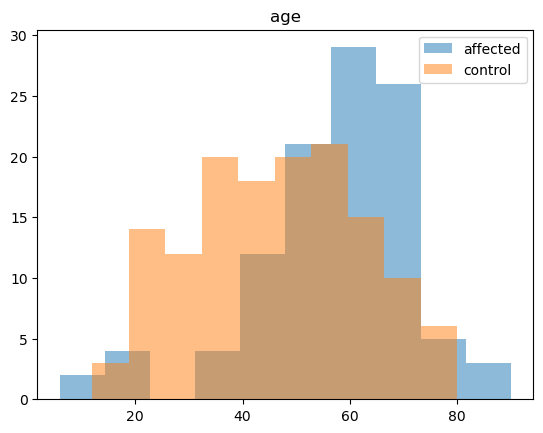

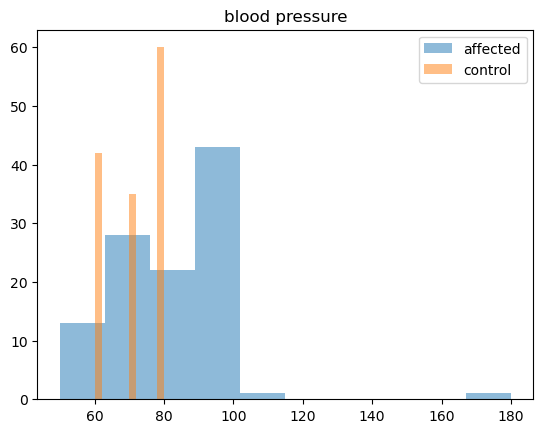

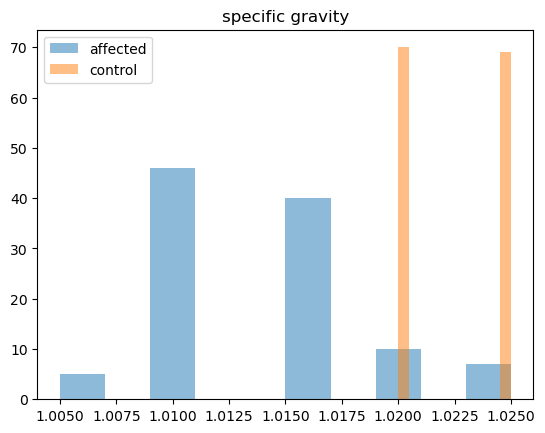

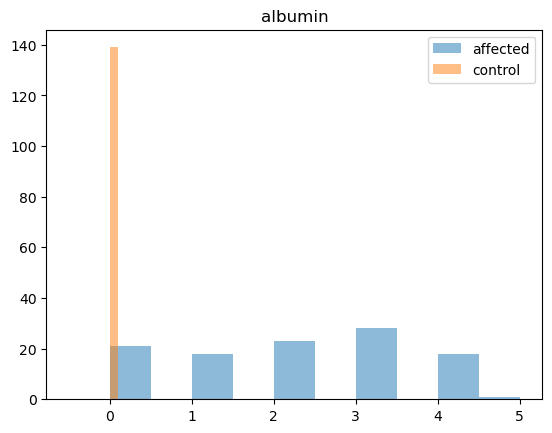

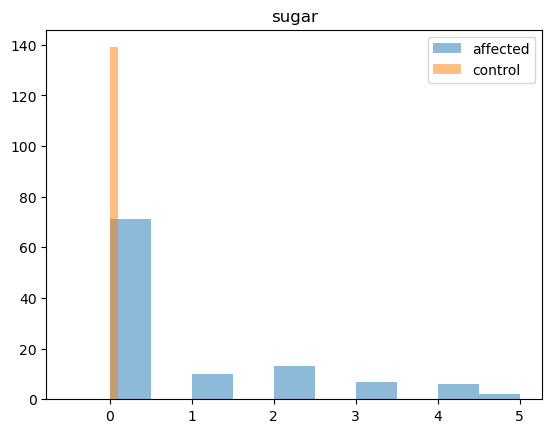

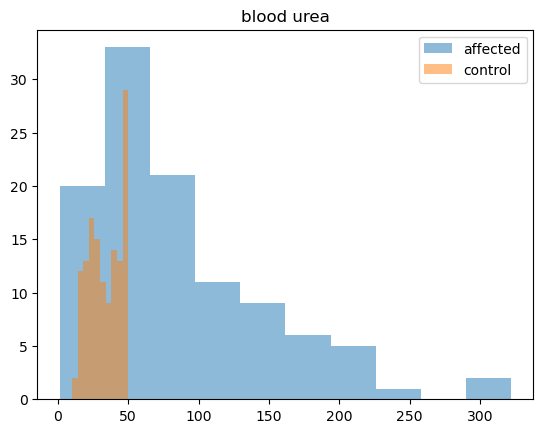

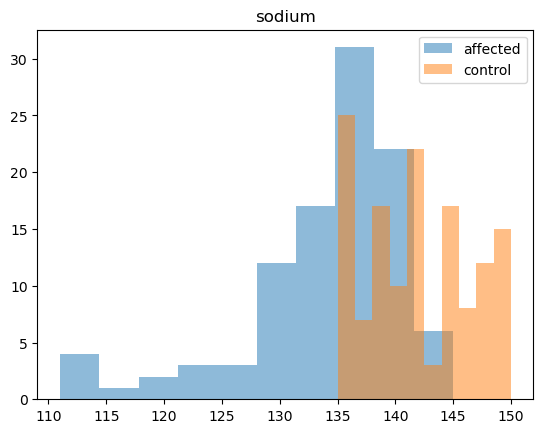

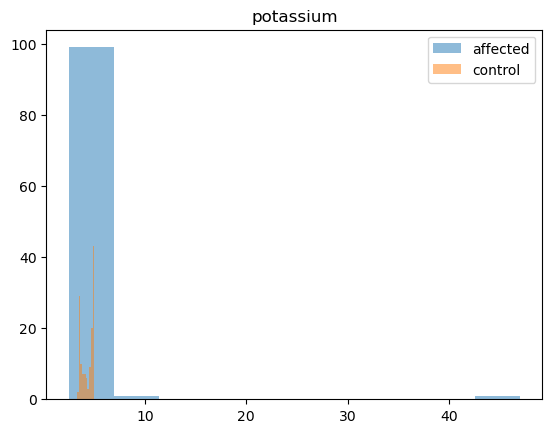

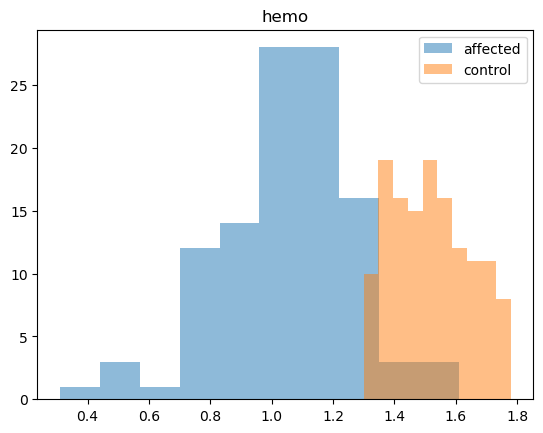

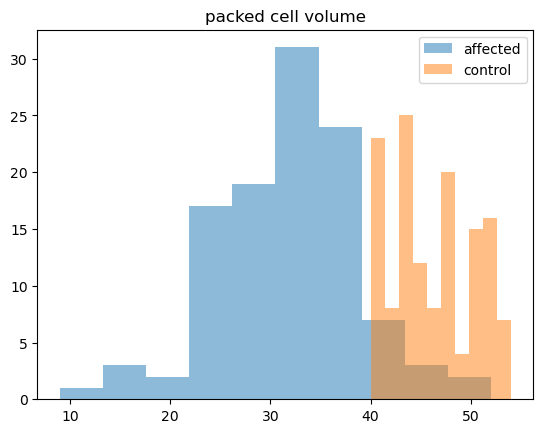

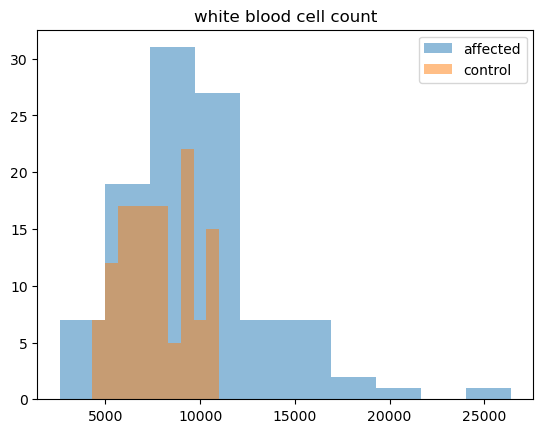

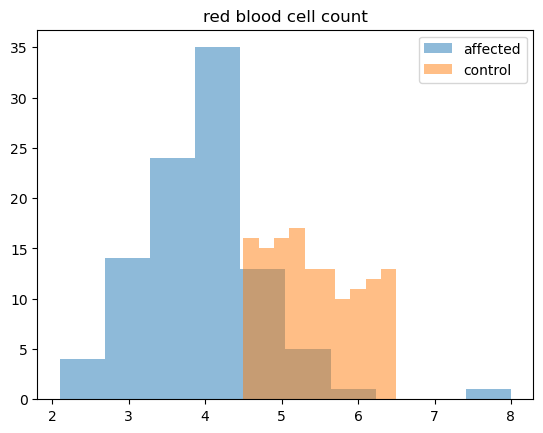

In [24]:
# Plot histograms for all columns in df_cleaned
for col in df_cleaned.columns:
    if col not in ['class', 'blood glucose random']:  # Exclude non-numeric columns
        fig, ax = plt.subplots()
        ax.hist(df_affected[col].dropna(), alpha=0.5, label='affected')
        ax.hist(df_control[col].dropna(), alpha=0.5, label='control')
        ax.set_title(col)
        ax.legend()
        plt.show()



In [21]:
# We combine the two data frames into a single data frame df_combined
# Add two columns 'affected' and 'control' to the data frame.
# The 'affected' column should have a value of 1 for all rows in the affected data frame and 0 for all rows in the control data frame.
# Convert non-numeric columns to numeric or drop them
df_affected['affected'] = 1
df_affected['healthy'] = 0
df_control['affected'] = 0
df_control['healthy'] = 1

# Combine the dataframes
df_combined = pd.concat([df_affected, df_control])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21276\2380856327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_affected['affected'] = 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21276\2380856327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_affected['healthy'] = 0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21276\2380856327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

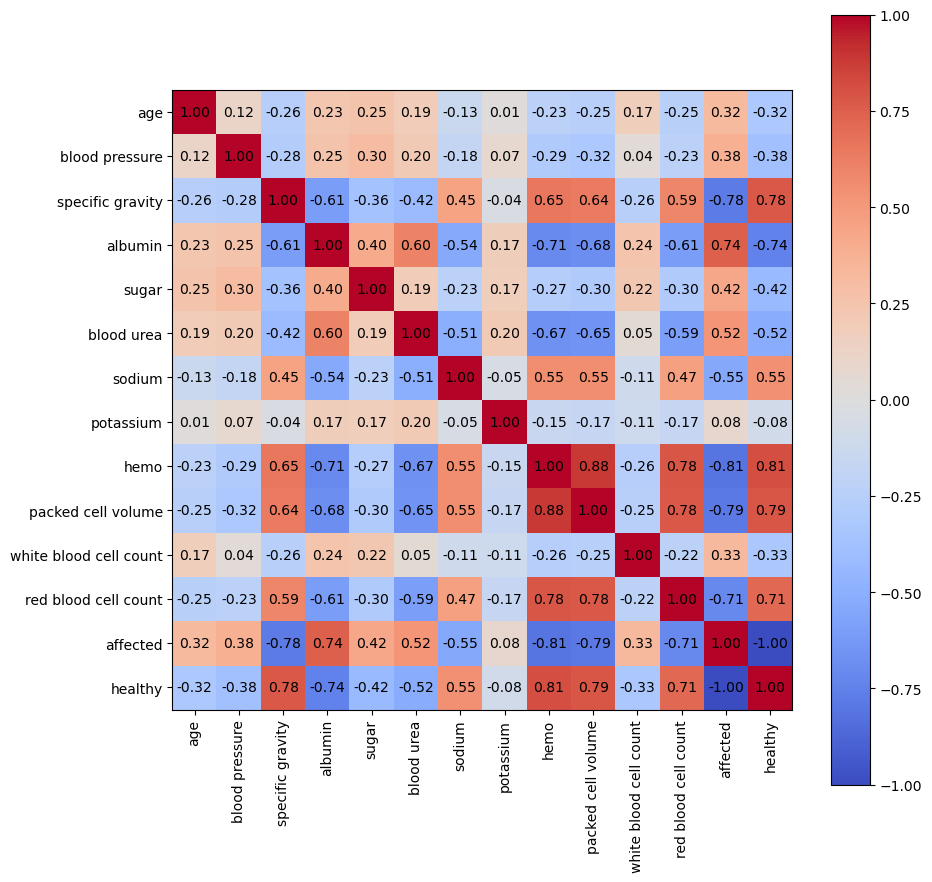

In [22]:
#Drop all rows with missing values or non numberic values
corr = df_combined.drop(columns=['blood glucose random', 'class']).corr() # drop rbc as it is non-numeric

# Visualize a correlation graph
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
# Annotate the correlation matrix with the correlation values
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()